## Pets breeds classifier.

This is a simple pet breeds classifier that can accurately classify from among 37 breeds of Dogs and Cats pictures. The architecture uses principles of transfer learning to use *Resnet-34* as our classifier, fine-tuned to fit from thousands of Cats and Dogs pictures.

### Importing

In [1]:
from fastai.vision.all import *
import warnings
warnings.filterwarnings('ignore')

### Getting the Image files

In [2]:
path = untar_data(URLs.PETS)

In [3]:
files = get_image_files(path/'images')

In [4]:
files[0:10]

(#10) [Path('/storage/data/oxford-iiit-pet/images/american_bulldog_146.jpg'),Path('/storage/data/oxford-iiit-pet/images/japanese_chin_12.jpg'),Path('/storage/data/oxford-iiit-pet/images/Sphynx_247.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_158.jpg'),Path('/storage/data/oxford-iiit-pet/images/beagle_76.jpg'),Path('/storage/data/oxford-iiit-pet/images/shiba_inu_207.jpg'),Path('/storage/data/oxford-iiit-pet/images/Siamese_56.jpg'),Path('/storage/data/oxford-iiit-pet/images/keeshond_194.jpg'),Path('/storage/data/oxford-iiit-pet/images/miniature_pinscher_89.jpg'),Path('/storage/data/oxford-iiit-pet/images/leonberger_42.jpg')]

From the file names above, we observe that all the file pictures are saved in a *breed_some sumber.jpg* format. So, fastai library has a special factory method *from_name_re* in the DataLoaders Class to use a regular expression to build labels in a DataLoader(dataloader are special type of datasets that PyTorch allows to use).

So, we'll create a regular expression to get our labels from the file names of the images.

In [5]:
pat = r'^(.*)_\d+.jpg'

In [6]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

We can look at data augmentation process done by the dataloaders class below.

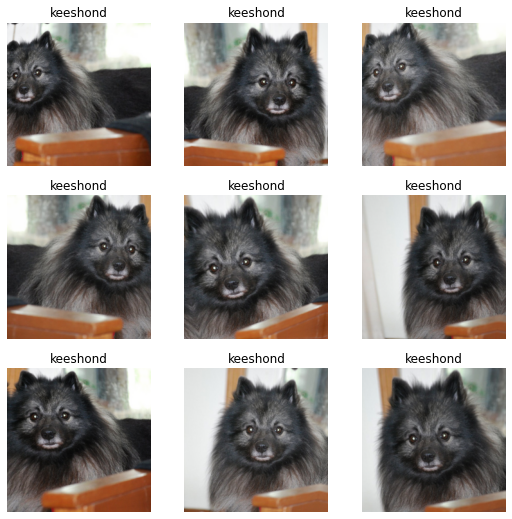

In [7]:
dls.show_batch(unique=True)

You can also notice that all images have been centre-cropped fro better utilisation.

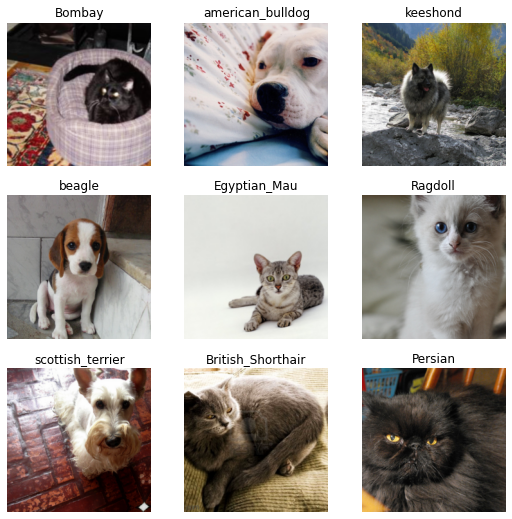

In [8]:
dls.show_batch()

### Modelling

Now, since we've got our image files, its time to input them into our architecture for it to learn. For this, we're gonna use the **Resnet-34** architecture.

In [9]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.518720,0.377858,0.123816,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.493573,0.299199,0.101489,01:07
1,0.379234,0.271382,0.085250,01:06
2,0.235909,0.230238,0.080514,01:07
3,0.150607,0.218137,0.073748,01:06


As you can see above, in under 5 mins., we trained  a model that can predict exactly the breed of a cat or a dog with a whopping 93% accuracy (7.3% error rate) which is pretty much State-of-the-art. The trained model can now be exported and utilised or deployed for proper applications.